> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import csv
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head() 
# Getting some rows to see what the data is about

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.shape
#get to know about how many rows and columns

(10866, 21)

In [7]:
df.info()
#understanding the types of data we have.
#here the object data are categorical variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.isnull().sum()
# we can see how many columns have how many null values.

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
pd.options.display.float_format = '{:.5f}'.format
df.describe()
# getting basic ideas about the statistics of data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000
mean,66064.17743,0.64644,14625701.09415,39823319.79339,102.07086,217.38975,5.97492,2001.32266,17551039.82289,51364363.25325
std,92130.13656,1.00018,30913213.83144,117003486.58209,31.38141,575.61906,0.93514,12.81294,34306155.72284,144632485.03997
min,5.00000,0.00007,0.00000,0.00000,0.00000,10.00000,1.50000,1960.00000,0.00000,0.00000
25%,10596.25000,0.20758,0.00000,0.00000,90.00000,17.00000,5.40000,1995.00000,0.00000,0.00000
50%,20669.00000,0.38386,0.00000,0.00000,99.00000,38.00000,6.00000,2006.00000,0.00000,0.00000
75%,75610.00000,0.71382,15000000.00000,24000000.00000,111.00000,145.75000,6.60000,2011.00000,20853251.08440,33697095.71731
max,417859.00000,32.98576,425000000.00000,2781505847.00000,900.00000,9767.00000,9.20000,2015.00000,425000000.00000,2827123750.41189


### Some observations we can make here is:
1. 64% movies have popularity.
2. budget,revenue is skweed in nature.
3. Majority of vote counts is between 17 and 145 highest being around 9.7k
4. Most of the movies were released in the year 2006 
5. The data has movies from 1960 to 2015.
6. We have lot of missing data in our datasets.

In [10]:
df.columns
# getting the columns so we know what is needed to be dropped.

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['id','imdb_id','homepage','tagline', 'keywords', 'overview'
       ,  'production_companies', 'release_date'],axis=1,inplace = True)

In [12]:
df.head()
#we cleaned by removing unwanted columns

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.50000,2015,137999939.28003,1392445892.52380
1,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.10000,2015,137999939.28003,348161292.48903
2,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.30000,2015,101199955.47202,271619025.40763
3,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.50000,2015,183999919.04004,1902723129.80182
4,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.30000,2015,174799923.08803,1385748801.47052


In [13]:
df['original_title'].value_counts().head()
# there are a few duplications

Hamlet                  4
Emma                    3
Annie                   3
Beauty and the Beast    3
Oliver Twist            3
Name: original_title, dtype: int64

In [14]:
check_list = df['original_title'].value_counts().head().index.tolist()
for i in check_list:
    df_dup = df[df['original_title'] == i]
    print(df_dup)
    print('=================================================================================================')
    
# since we can see that the same title have diffrent values, so we dont drop them.

       popularity   budget   revenue original_title  \
1890      0.08649        0         0         Hamlet   
8573      0.38347        0         0         Hamlet   
8797      0.27780  2000000   1568749         Hamlet   
10106     0.06797        0  20710451         Hamlet   

                                                    cast           director  \
1890   David Tennant|Patrick Stewart|Penny Downie|Oli...      Gregory Doran   
8573   Kenneth Branagh|Derek Jacobi|Julie Christie|Ri...    Kenneth Branagh   
8797   Ethan Hawke|Kyle MacLachlan|Diane Venora|Sam S...  Michael Almereyda   
10106  Mel Gibson|Glenn Close|Alan Bates|Paul Scofiel...  Franco Zeffirelli   

       runtime         genres  vote_count  vote_average  release_year  \
1890       185          Drama          13       6.40000          2009   
8573       242          Drama          51       6.70000          1996   
8797       112          Drama          18       5.00000          2000   
10106      130  Drama|History       

In [15]:
df.duplicated().sum() ## returned 1


1

In [16]:
df.drop_duplicates(keep=False,inplace=True)
df.duplicated().sum() ## returns 0 , so duplicate is deleted.

0

In [17]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [18]:
df.shape

(10864, 13)

In [19]:
df.dropna(axis=0,inplace=True)
# dropping the null valued genere rows

In [20]:
df.shape

(10730, 13)

In [21]:
df.isnull().sum()
# now we dont have any null values

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e9365ab90>,
      dtype=object)

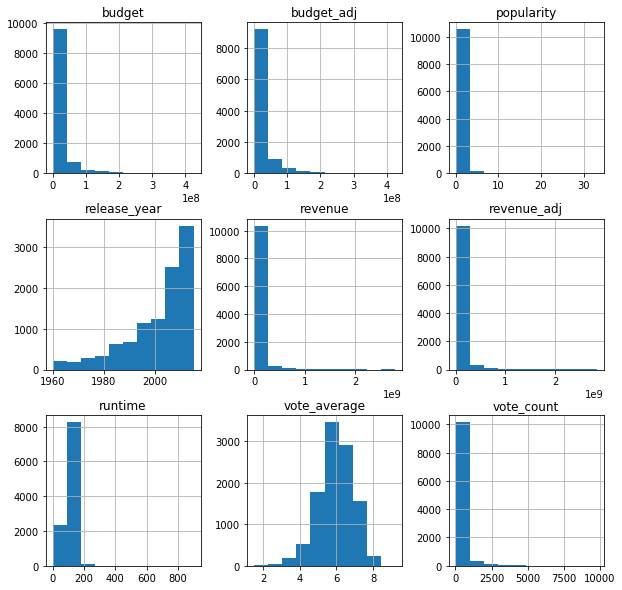

In [22]:
df.hist(figsize=(10,10))
# release_year,runtime is scewed towards the left
# vote_average has normal distribution
# all others are scewed towards the right

In [23]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.50000,2015,137999939.28003,1392445892.52380
1,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.10000,2015,137999939.28003,348161292.48903
2,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.30000,2015,101199955.47202,271619025.40763
3,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.50000,2015,183999919.04004,1902723129.80182
4,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.30000,2015,174799923.08803,1385748801.47052


<a id='eda'></a>
## Exploratory Data Analysis


In [24]:
def max(column):
    max_count = df[column].max()
    return max_count
    
def min(column):
    min_count = df[column].min()
    return min_count
    
# max is used to get the maximum value in the column and min is used for getting the minimum value in column.    

In [25]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = df[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [26]:
def avg(column):
    avg = df[column].mean()
    print(avg)
    
# avg is used to get the average value in column    

1.Which is the most and least popular movie?

In [27]:
most_popular_movie = df[df['popularity'] == max('popularity')]
print("Most popular movie is: " + most_popular_movie.original_title)
most_popular_movie = df[df['popularity'] == min('popularity')]
print("Least popular movie is:" + most_popular_movie.original_title)

0    Most popular movie is: Jurassic World
Name: original_title, dtype: object
9977    Least popular movie is:The Hospital
Name: original_title, dtype: object


2.Which movie took the highest budget for its making?

In [28]:
most_budget_movie = df[df['budget'] == max('budget')]
print(most_budget_movie.original_title + " ")
print(most_budget_movie.budget)

2244    The Warrior's Way 
Name: original_title, dtype: object
2244    425000000
Name: budget, dtype: int64


3.What is the average revenue of the movies

In [29]:
avg('revenue')

40323555.14510717


4.What is the average running time if the movies

In [30]:
avg('runtime')

102.46980428704566


5.What is the average budget of the movies

In [31]:
avg('budget')

14802229.894874185


6.Who is the most acted star

In [32]:
data('cast').head(5)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
dtype: int64

7.Which genre is mostly produced

In [33]:
data('genres').head(5)

Drama       4745
Comedy      3775
Thriller    2901
Action      2375
Romance     1708
dtype: int64

8.Which movie got the highest votes

In [34]:
most_voted_movie = df[df['vote_count'] == max('vote_count')]
print("Most voted movie is: " + most_voted_movie.original_title)

1919    Most voted movie is: Inception
Name: original_title, dtype: object


9.which director has done the most number of movies

In [35]:
data('director').head(5)

Woody Allen          46
Clint Eastwood       34
Steven Spielberg     30
Martin Scorsese      30
Steven Soderbergh    23
dtype: int64

10.How has popularity varied with respect to year

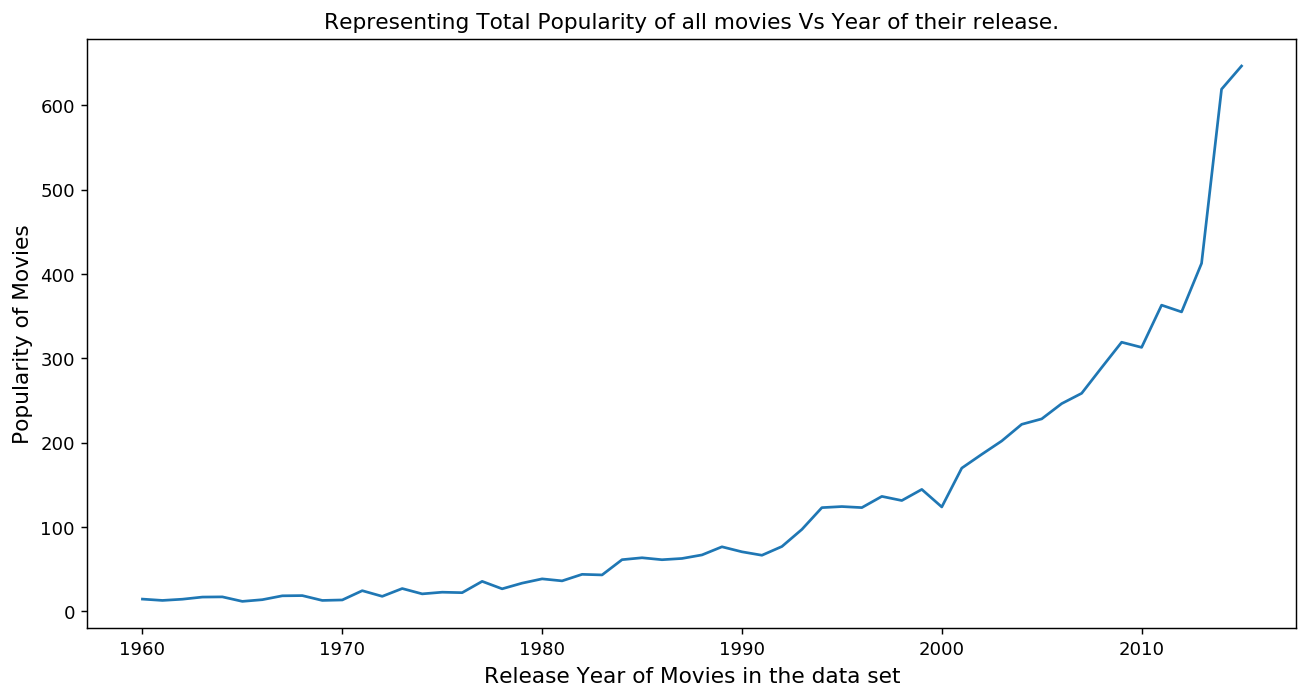

In [36]:
popularity_year = df.groupby('release_year')['popularity'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Popularity of Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Popularity of all movies Vs Year of their release.')

#plotting the graph
plt.plot(popularity_year)

#displaying 

11.which year was the highest number of movie released to that of lowest (with chart)

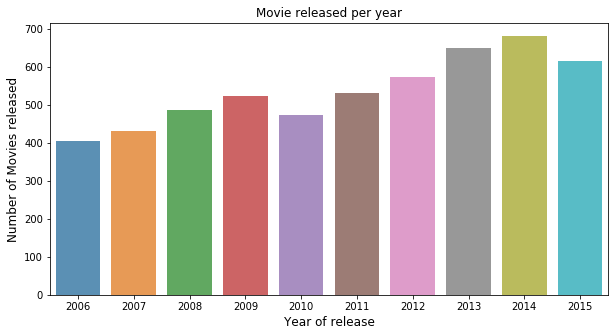

In [37]:
city_count  = df['release_year'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Movie released per year')
plt.ylabel('Number of Movies released', fontsize=12)
plt.xlabel('Year of release', fontsize=12)
plt.show()

12. How is correlation between each of columns

In [39]:
df.corr(method ='kendall') 

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.00000,0.42621,0.47789,0.16427,0.59789,0.11835,0.02714,0.42001,0.46830
budget,0.42621,1.00000,0.60112,0.23209,0.46460,0.05522,-0.01673,0.95329,0.58483
revenue,0.47789,0.60112,1.00000,0.24602,0.53868,0.14814,-0.06041,0.60153,0.96433
runtime,0.16427,0.23209,0.24602,1.00000,0.16884,0.18890,-0.12302,0.24217,0.24979
vote_count,0.59789,0.46460,0.53868,0.16884,1.00000,0.19670,0.07011,0.45623,0.52454
vote_average,0.11835,0.05522,0.14814,0.18890,0.19670,1.00000,-0.07592,0.06478,0.15406
release_year,0.02714,-0.01673,-0.06041,-0.12302,0.07011,-0.07592,1.00000,-0.05909,-0.09075
budget_adj,0.42001,0.95329,0.60153,0.24217,0.45623,0.06478,-0.05909,1.00000,0.59534
revenue_adj,0.46830,0.58483,0.96433,0.24979,0.52454,0.15406,-0.09075,0.59534,1.00000


<a id='conclusions'></a>
## Conclusions





##### 1. 'Jurassic World' is the most popular movie and Least popular movie is 'The Hospital'

##### 2. The Warrior's Way was the most expensive movie with a buget of 425 million dollars.

##### 3. The average revenue is around 40 million dollars.

##### 4. The average running time of movies is around 102 minutes.

##### 5. The average expensive invested to produce a movie is around 148 million dollars.

##### 6. Robert De Niro has acted most number of times.

##### 7. The highest number of movies produced are Drama

##### 8. Inception has got the most number of votes.

##### 9. Woody Allen has directed the most number of movies

##### 10. Every year there is a drastic increase in the popularity of movies.

##### 11. 2014 had produced the highest number of movies.

### What we can get insight about the finding:

 -> There is a rise in need of movies and hence it is safe to invest on it
 
 -> More people prefer Drama and Comedy movies and hence invest wisely over it.
 
 -> More popular movie had more votes.
 
 -> Budget and revenue are correlated with each other so invest accordingly.
 
 -> Go for Woody Allen,Clint Eastwood.Steven Spielbeg,Martin Scorsese,Steven Soderbergh for choosing best direction.
 
 -> Choosing Robert De Niro,Samuel L. Jackson,Bruce Willis,Nicolas Cage,Michael Caine  is better for more success and popularity

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])